## Microsoft Studios Movie Analysis
#### Sidney Kung
(Add picture of Microsoft brand header)

### Business Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Overview
This project analyzes ... using ... method ... using .... data.

In [326]:
# importing the necessary pandas and matplotlib libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import src

### Understanding the Data

The DataFrame was complied by combining four data sets from the websites IMDB and TMDB. Each dataset contained useful information about movies. I cleaned the datasets before merging them and importing them for analysis.

Origin file names:
- imdb.title.basics.csv.gz
- imdb.title.ratings.csv.gz
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

In [327]:
# loading all_movies_df and setting it to the variable all_movies
all_movies = pd.read_csv('all_movies_df.csv')

In [328]:
# all_movies.head()

In [329]:
# all_movies.info()

In [330]:
# all_movies.describe(include='all')

# Analysis

## 1. Average Domestic Gross Each Month
#### (Optimal Release Times During the Year)

In [331]:
# Creating a new column of release dates without year
all_movies['release_month'] = pd.DatetimeIndex(all_movies['release_date_x']).month

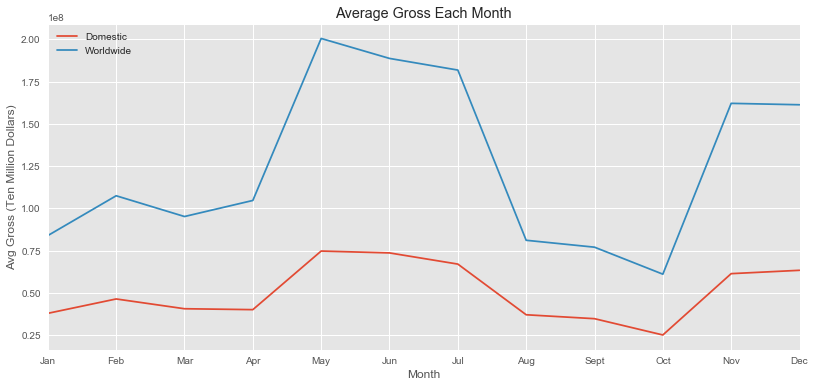

In [332]:
# x-axis: sorting dataframe by months and setting that equal to months
all_movies.sort_values(by='release_month', ascending=True)
months = sorted(all_movies['release_month'].unique())
# y-axis: average gross (ten million dollars)
# comparing domestic_gross and worldwide_gross
d_gross = all_movies.groupby('release_month')['domestic_gross'].mean()
w_gross = all_movies.groupby('release_month')['worldwide_gross'].mean()

# creating a line plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(months, d_gross)
ax.plot(months, w_gross)

# legend
plt.legend(['Domestic', 'Worldwide'], loc=2)

# setting title and axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Avg Gross (Ten Million Dollars)')
ax.set_title('Average Gross Each Month')

# setting x-axis labels to match each month
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

# renaming each axis tick by month name
plt.show()

## 2. Average Return on Investment (ROI) 
- working with production_budget and worldwide_gross
- graph would be a line plot

In [333]:
# calculating the ROI for each movie by dividing the 'worldwide_gross' and 'production_bugdet' columns, multipling 100 to get a percentage, and creating new column 'roi'
all_movies['roi'] = (all_movies['worldwide_gross'] / all_movies['production_budget']) * 100

(0, 1500)

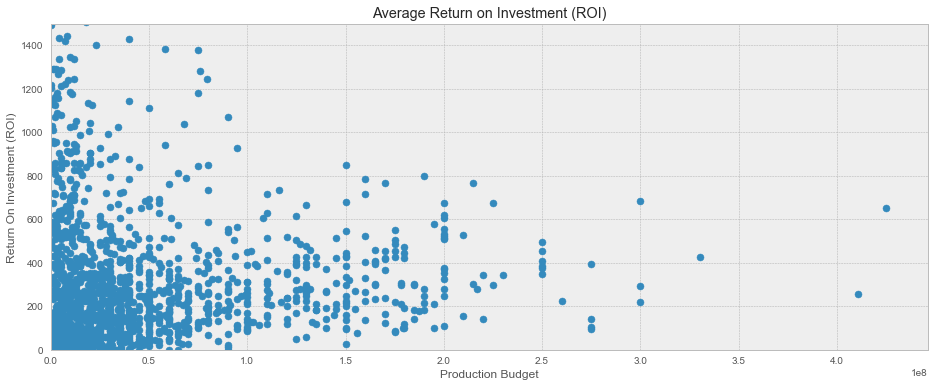

In [334]:
# x-axis
prod_budget = all_movies['production_budget']
# y-axis
roi = all_movies['roi']

# creating a scatter plot
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(14,6))
roi_plot = ax.scatter(prod_budget, roi)

# setting title and axis labels
ax.set_xlabel('Production Budget')
ax.set_ylabel('Return On Investment (ROI)')
ax.set_title('Average Return on Investment (ROI)')

ax.set_xlim(0)
ax.set_ylim(0, 1500)

## 3. Average Budget According to Runtime
- working with production_budget and runtime_minutes
- graph would be a bar plot


In [335]:
# calculating revenue for each movie by vectorizing 'worldwide_gross' and 'budget', and creating a new column 'revenue'
all_movies['raw_revenue'] = all_movies['worldwide_gross'] - all_movies['production_budget']

# binning 'revenue' column by IQR intervals, and calculating to exclude outliers
all_movies['revenue'] = pd.cut(all_movies['raw_revenue'], bins=[-1614407,13874970,78809720,118214580], labels=['low','medium', 'high'])

In [336]:
all_movies.head()

,Unnamed: 0,imdb_tconst,primary_title,imdb_orig_title,start_year,runtime_minutes,genres,imdb_avg_rating,imdb_numvotes,db_genre_ids,...,release_date_x,db_vote_avg,db_vote_count,production_budget,domestic_gross,worldwide_gross,release_month,roi,raw_revenue,revenue
0,0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,"[35, 18]",...,2018-11-02,7.0,64,NaN,NaN,NaN,11,NaN,NaN,NaN
1,1,tt0112502,Bigfoot,Bigfoot,2017,91.0,"Horror,Thriller",4.1,32.0,"[27, 878, 12]",...,2012-06-30,2.9,26,NaN,NaN,NaN,6,NaN,NaN,NaN
2,4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72.0,[18],...,2018-11-06,7.5,2,NaN,NaN,NaN,11,NaN,NaN,NaN
3,5,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,"[16, 28, 35, 10751]",...,2013-05-07,2.1,46,45000000.0,0.0,73706.0,5,0.163791,-44926294.0,NaN
4,6,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123.0,"[35, 18]",...,2013-08-11,7.0,1,NaN,NaN,NaN,8,NaN,NaN,NaN


(0, 200000000)

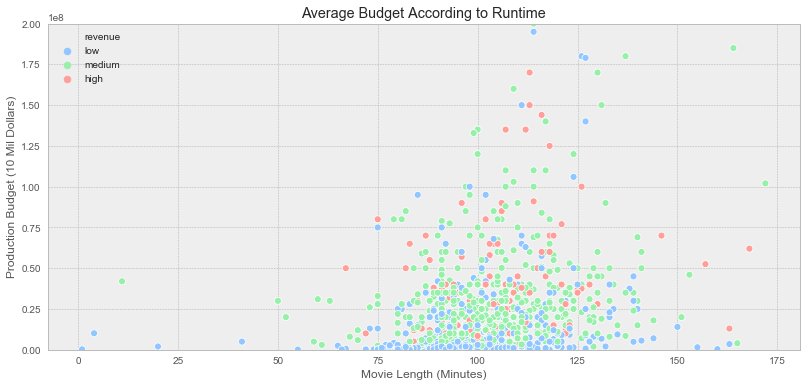

In [337]:
# create scatterplot using seaborn
plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=all_movies, x="runtime_minutes", y="production_budget", hue="revenue", hue_order=['low','medium','high'])

# legend in upper left corner
plt.legend(loc=2)

# setting title and axis labels
ax.set_xlabel('Movie Length (Minutes)')
ax.set_ylabel('Production Budget (10 Mil Dollars)')
ax.set_title('Average Budget According to Runtime')

# set y-limit
ax.set_ylim(0, 200000000)

## 4. Average Rating per Genre
- working with genre and imdb_avg_rating
- graph would be a bar plot, with x:genre and y:rating

In [357]:
# creating new DataFrame with 'genre' and 'imdb_avg_rating' columns from all_movies
all_genres = all_movies[['genres', 'imdb_avg_rating','db_popularity']].copy()

# replacing 'missing' with NaN value and dropping those rows
all_genres['genres'] = all_genres['genres'].replace('missing', np.NaN)
all_genres.dropna(inplace=True)
# splitting 'genres' column
all_genres[['Genre_1','Genre_2','Genre_3']] = all_genres.genres.str.split(",",expand=True,)

# all_genres = all_genres[all_genres.genres != 'missing']
# all_genres.genres = src.coerce_to_list(all_genres,'genres')
# scaffold = all_genres[['genres', 'imdb_avg_rating', 'db_popularity']]
# all_genres = src.generate_genre_dataframe(scaffold)

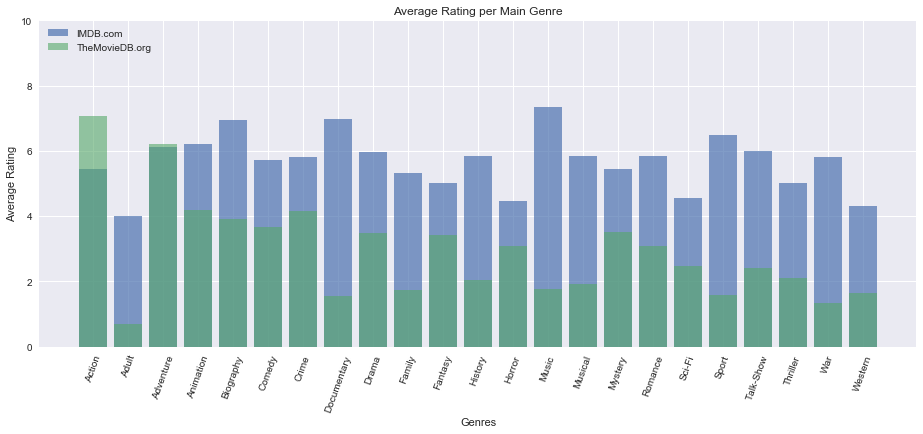

In [361]:
# # y-axis
imdb_rating = all_genres.groupby('Genre_1')['imdb_avg_rating'].mean()
db_rating = all_genres.groupby('Genre_1')['db_popularity'].mean()
# imdb_rating = src.genre_pandas_mean(all_genres, 'imdb_avg_rating')
# db_rating = src.genre_pandas_mean(all_genres, 'db_popularity')

# x-axis
categories = imdb_rating.index

# creating a bar plot
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(categories, imdb_rating, alpha=0.7)
ax.bar(categories, db_rating, alpha=0.6)

# setting title and axis labels
ax.set_xlabel('Genres')
plt.xticks(rotation=70)
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating per Main Genre')

# setting legend and ylim
plt.legend(['IMDB.com', 'TheMovieDB.org'], loc=2)
ax.set_ylim(0, 10)

plt.show()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fb1440ebcf8&gt;

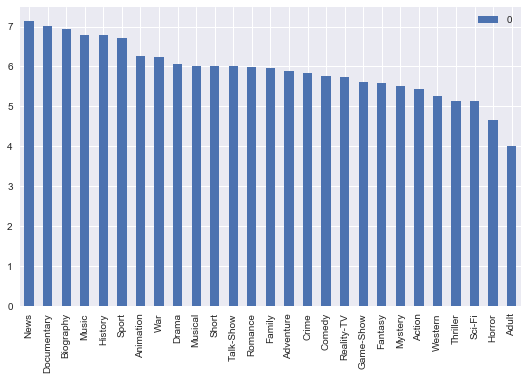

In [345]:
imdb_rating.plot(kind='bar')

## Business Questions:
This analysis leads to three reccomendations for Microsoft studios to begin producing popular movies. 
- 1
- 2
- 3

## Conclusions:


## Next Steps
Further analyses could yield additional insights to further produce popular movies:

- Better prediction of animals that are likely to have long stays. This modeling could use already available data, such as breed and intake condition.

- Model need for medical support. This modeling could predict the need for specialized personnel to address animals' medical needs, including neutering, using intake condition and sex data.
- Predicting undesirable outcomes. This modeling could identify animals that are more likely to have undesirable outcomes (e.g. Euthanasia) for targeted medical support or outreach.